# Abstract

Powered by Dark Sky (https://darksky.net/poweredby/)

# next steps

* deal with missing values in darksky data
* combine the darksky data with the driven data data
* normalize the features
* do some eda
* look for feature importance
* use FB Prophet


# Imports

In [1]:
# imports

# misc
import datetime
import os, sys, shutil

# basics
import numpy as np
from numpy import loadtxt
import pandas as pd
from tqdm import tqdm

# charting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


# for darksky api
import json
from pandas.io.json import json_normalize
import requests

# Code needed on initial run only

In [2]:
# load the data
df_train = pd.read_csv('source_data/dengue_features_train.csv') 

In [3]:
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [4]:
train_labels = pd.read_csv('source_data/dengue_labels_train.csv')

In [5]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [6]:
train_labels['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [7]:
df_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [8]:
df_sj = df_train[df_train['city'] == 'sj']
df_iq = df_train[df_train['city'] == 'iq']

In [9]:
print("sj length: {}".format(len(df_sj)))
print("iq length: {}".format(len(df_iq)))

sj length: 936
iq length: 520


In [10]:
# https://www.pythonprogramming.in/get-the-day-of-week-from-given-a-date-in-python.html
# Python's program to get the day of week of today or given date.
 
dayofweek = datetime.date(2010, 6, 16).strftime("%A")
print(dayofweek)
# weekday Monday is 0 and Sunday is 6
print("weekday():", datetime.date(2010, 6, 16).weekday())
 
# isoweekday() Monday is 1 and Sunday is 7
print("isoweekday()", datetime.date(2010, 6, 16).isoweekday())
 
dayofweek = datetime.datetime.today().strftime("%A")
print(dayofweek)
print("weekday():", datetime.datetime.today().weekday())
print("isoweekday()", datetime.datetime.today().isoweekday())

Wednesday
weekday(): 2
isoweekday() 3
Friday
weekday(): 4
isoweekday() 5


In [11]:
dayofweek

'Friday'

In [12]:
df_sj['week_start_date'].head(10)

0    1990-04-30
1    1990-05-07
2    1990-05-14
3    1990-05-21
4    1990-05-28
5    1990-06-04
6    1990-06-11
7    1990-06-18
8    1990-06-25
9    1990-07-02
Name: week_start_date, dtype: object

In [13]:
df_sj.tail(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
926,sj,2008,8,2008-02-19,-0.13865,-0.095067,0.246057,0.228129,0.00,297.907143,...,8.30,74.785714,0.00,14.538571,1.885714,24.900000,5.785714,28.3,21.7,13.3
927,sj,2008,9,2008-02-26,NaN,0.015420,0.211629,0.117343,0.00,297.765714,...,6.46,72.660000,0.00,13.967143,2.285714,24.742857,5.500000,27.8,21.1,12.9
928,sj,2008,10,2008-03-04,-0.08890,-0.090033,0.223243,0.154186,0.00,297.878571,...,6.50,74.681429,0.00,14.474286,2.614286,25.114286,6.114286,29.4,21.1,13.0
929,sj,2008,11,2008-03-11,-0.32140,-0.141200,0.110643,0.141014,0.00,297.595714,...,9.38,71.934286,0.00,13.721429,2.085714,25.328571,5.814286,28.9,22.2,4.4
930,sj,2008,12,2008-03-18,0.04490,0.024450,0.101629,0.088000,0.00,297.404286,...,0.90,72.915714,0.00,13.737143,3.871429,25.200000,7.042857,30.0,20.6,0.5
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,sj,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,...,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3


In [14]:
df_iq.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
941,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,1.00,74.728571,16.24,13.421429,13.771429,25.340000,10.940000,32.0,17.0,11.5
942,iq,2000,32,2000-08-12,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,...,26.68,83.275714,89.37,15.311429,11.471429,27.016667,11.650000,34.0,19.9,72.9
943,iq,2000,33,2000-08-19,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,...,16.90,82.490000,42.08,15.465714,13.700000,26.583333,10.316667,33.0,20.5,50.1
944,iq,2000,34,2000-08-26,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,...,5.59,74.740000,49.22,14.444286,13.771429,26.900000,13.400000,34.0,19.0,89.2
945,iq,2000,35,2000-09-02,0.332043,0.321057,0.314614,0.324257,53.65,299.218571,...,16.07,74.151429,53.65,15.057143,12.457143,27.116667,12.266667,34.0,20.0,78.0


In [15]:
df_iq.tail(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1446,iq,2010,16,2010-04-23,0.231486,0.294686,0.331657,0.244400,86.70,298.438571,...,81.40,95.995714,86.70,19.448571,7.757143,27.850000,9.600000,33.5,22.5,51.1
1447,iq,2010,17,2010-04-30,0.239743,0.259271,0.307786,0.307943,26.00,299.048571,...,23.60,87.657143,26.00,18.068571,8.257143,28.850000,12.125000,36.2,21.4,35.4
1448,iq,2010,18,2010-05-07,0.260814,0.255786,0.257771,0.340286,73.97,297.617143,...,85.46,96.712857,73.97,18.602857,5.714286,27.600000,9.600000,33.2,21.4,8.1
1449,iq,2010,19,2010-05-14,0.168686,0.158500,0.133071,0.145600,59.40,297.278571,...,87.30,97.445714,59.40,18.391429,6.185714,27.400000,10.400000,33.7,21.2,32.0
1450,iq,2010,20,2010-05-21,0.263071,0.272500,0.258271,0.244500,1.15,297.648571,...,8.80,78.998571,1.15,14.908571,11.242857,25.633333,9.200000,34.0,20.0,2.5
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4


In [16]:
sj_start_week = df_sj['weekofyear'][df_sj['year'] == 1990]
sj_end_week = df_sj['weekofyear'][df_sj['year'] == 2008]

iq_start_week = df_iq['weekofyear'][df_iq['year'] == 2000]
iq_end_week = df_iq['weekofyear'][df_iq['year'] == 2010]

In [17]:
iq_start_week.describe()

count    26.000000
mean     38.500000
std       7.648529
min      26.000000
25%      32.250000
50%      38.500000
75%      44.750000
max      51.000000
Name: weekofyear, dtype: float64

In [18]:
print('sj min: {}'.format(sj_start_week.min()))
print('sj max: {}'.format(sj_end_week.max()))

print('iq min: {}'.format(iq_start_week.min()))
print('iq max: {}'.format(iq_start_week.max()))

sj min: 18
sj max: 17
iq min: 26
iq max: 51


In [19]:
# sj starts in week 18 of 1990 and ends week 17 of 2008
# iq starts in week 26 of 2000 and ends week 51 of 2010

# estimates of the number of api calls to darksky:
# sj = 35 weeks in 1990 + 52 weeks 1991 - 2008 + 17 weeks in 2008 = 988 weeks x 7 days = 6,916
# iq = 27 weeks in 2000 + 52 weeks 2001 - 2009 + 51 weeks in 2010 = 546 weeks x 7 days = 3,822
# total = 10,738 whcih means 11 days of 1K/day

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [21]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [22]:
df_train['total_cases'] = train_labels['total_cases']

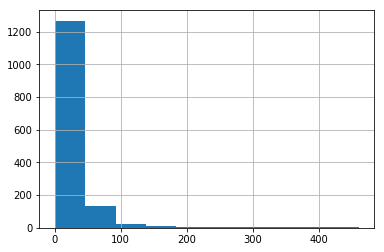

In [23]:
df_train['total_cases'].hist()

In [24]:
df_train.iloc[:,4:12].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000


In [25]:
df_train.iloc[:,12:18].describe()

,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg
count,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000
mean,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427
std,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494
min,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714
25%,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143
50%,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143
75%,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214
max,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429


In [26]:
df_train.iloc[:,18:24].describe()

,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


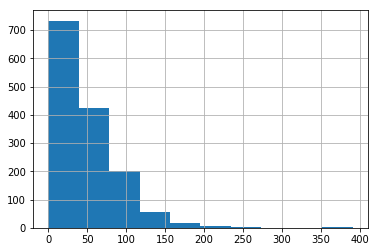

In [27]:
df_train.precipitation_amt_mm.hist()

In [28]:
# get darksky.net historical weather information

# request format:  https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

# San Juan, Puerto Rico - Latitude: 18.4653, Longitude: -66.1167
# Iquitos, Peru:  - Latitude: -3.74937, Longitude: -73.2444




In [29]:
# this gets current SF weather forecast
# SF: 37.7648, -122.463

# target = 'https://api.darksky.net/forecast/9501b92a37587155d222ae11b77c65a3/37.63474, -122.109015'

# req = requests.get(url=target)
# json_data = json.loads(req.text)
# print(json.dumps(json_data, indent=4, sort_keys=True))


Strategy for additional environmental data:
Collect the dark sky data into a seperate dataframe with daily values for each city
# double check these dates

San Juan first week start date is 1990-04-30 (Monday)
San Juan last week start date is 2008-04-22 (Tuesday)

Iquitos first week start date is 2000-07-01 (Saturday)
Iquitos last week start date is 2010-06-25 (Friday)

The San Juan data is weekly and begins on Monday 1990-04-30 @ 12:00 AM and ends on Sunday 2008-04-28 @ 11:59 PM 
*** there appears to be a discrepancy in the weekly start day from the beginning to the end

The Iquitos data is weekly and begins on Saturday 2000-07-01 @ 12:00 AM and ends on Friday 2010-07-02 @ 11:59 PM
*** there appears to be a discrepancy in the weekly start day from the beginning to the end

I have read that mosquito eggs can stay viable for over a decade, hatching when conditions are acceptable.

I am choosing to gather additional weather data for 1 year prior to the start dates above, so the dates I want weather data for are:

San Juan: 1989-05-01 to 2008-04-28

Iquitos:  1999-06-30 to 2010-07-02


In [30]:
# psuedo code for getting the darksky data at 1K/day

# each record in the training set has the city code and the start day of that week
# convert the start day of week to UNIX epoch timestamp at the city of the record, 
# ie. 2009-04-30 becomes 641433600 (midnight on 4/30/2009)


# make 7 calls to the api, incrementing each by 
# 
# set start year and day for sj and iq
# set end year and day for sj and iq
# make weather_data_df with two columns: index(auto), city, datetime
# for index in weather_data_df:
#   create the url
#   call the api
#   write the data to a df
#   save the df as a csv
# 


In [31]:
# get darksky.net historical weather information
# request format:  https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]

# variables
# San Juan, Puerto Rico - Latitude: 18.4653, Longitude: -66.1167
# Iquitos, Peru:  - Latitude: -3.74937, Longitude: -73.2444


darksky_key = '9501b92a37587155d222ae11b77c65a3'

sj_lat = 18.4653
sj_lon = -66.1167
iq_lat = -3.74937
iq_lon = -73.2444

sj_start = '1989-05-01'
sj_end = '2008-04-28'
iq_start = '1999-06-30'
iq_end = '2010-07-02'

sj_elapsed = pd.Timestamp(sj_end)  - pd.Timestamp(sj_start)
iq_elapsed = pd.Timestamp(iq_end) - pd.Timestamp(iq_start)

sj_day_count = sj_elapsed.days
iq_day_count = iq_elapsed.days


In [32]:
print(sj_day_count)
print(iq_day_count)

6937
4020


In [33]:
sj_day_list = pd.date_range(sj_start, periods=sj_day_count, freq='D')
iq_day_list = pd.date_range(iq_start, periods=iq_day_count, freq='D')

In [34]:
sj_days_df = pd.DataFrame(sj_day_list.astype(str))
iq_days_df = pd.DataFrame(iq_day_list.astype(str))


In [35]:
sj_days_df.head()

,0
0,1989-05-01
1,1989-05-02
2,1989-05-03
3,1989-05-04
4,1989-05-05


In [36]:
sj_days_df.columns = (['date'])
iq_days_df.columns = (['date'])
sj_days_df.columns


Index(['date'], dtype='object')

In [37]:
# this function was throwing an error about halfway through the 6K records for San Juan, stating that there was 
# a key error ['daily']


def get_darksky_data(key, latitude, longitude, days_df, start_index, count):

    start = datetime.datetime.now()
    print('Now obtaining {} days of records from DarkSky'.format(count))

    temp_df = pd.DataFrame()
    current_index = start_index
    for i in range(count):
        day = days_df.iloc[current_index]['date']
        day_string = day + 'T00:00:00'
#         print(day_string)
        target = 'https://api.darksky.net/forecast/' + darksky_key + '/' + str(latitude) + ',' + str(longitude) + ',' + day_string + '?exclude=currently,hourly,flags'
#         print(target)
        req = requests.get(url=target)
        json_data = json.loads(req.text)
#         print(json.dumps(json_data, indent=4, sort_keys=False))

        with open('temp_text.txt', 'a') as the_file:
            the_file.write(json.dumps(json_data, sort_keys=False) + '\n')
    
        current_index += 1
#         print(json_normalize(json_data['daily']['data'], max_level=0))
        
#         if json_data['daily']:
        temp_df = temp_df.append(json_normalize(json_data['daily']['data'], max_level=0), ignore_index=True, verify_integrity=True, sort=False)
#         if i == count // 10:
#             end = datetime.datetime.now()
#             elapsed = end - start
#             remaining = elapsed * 9
#             print('10% of calls took {}'.format(elapsed))
#             print('Remaining 90% is estimated to take another {}'.format(remaining))
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Obtaining {} days took a total of {}'.format(count, elapsed))

    return temp_df

In [38]:
def darksky_data_to_text_file(key, latitude, longitude, days_df, start_index, count, text_file):
    update_flag = True

    start = datetime.datetime.now()
    print('Now obtaining {} days of records from DarkSky and saving to {}'.format(count, text_file))

#     temp_df = pd.DataFrame()
    current_index = start_index
    for i in range(count):
        day = days_df.iloc[current_index]['date']
        day_string = day + 'T00:00:00'
#         print(day_string)
        target = 'https://api.darksky.net/forecast/' + darksky_key + '/' + str(latitude) + ',' + str(longitude) + ',' + day_string + '?exclude=currently,hourly,flags'
#         print(target)
        req = requests.get(url=target)
        json_data = json.loads(req.text)
#         print(json.dumps(json_data, indent=4, sort_keys=False))

        with open(text_file, 'a') as the_file:
            the_file.write(json.dumps(json_data, sort_keys=False) + '\n')
    
        current_index += 1
#         print(json_normalize(json_data['daily']['data'], max_level=0))
        
#         if json_data['daily']:
#         temp_df = temp_df.append(json_normalize(json_data['daily']['data'], max_level=0), ignore_index=True, verify_integrity=True, sort=False)
        if update_flag:
            if i == count // 10:
                end = datetime.datetime.now()
                elapsed = end - start
                remaining = elapsed * 9
                print('10% of calls took {}'.format(elapsed))
                print('Remaining 90% is estimated to take another {}'.format(remaining))
                update_flag = False
    
    end = datetime.datetime.now()
    elapsed = end - start
    print('Obtaining {} days took a total of {}'.format(count, elapsed))

#     return temp_df

In [39]:
# get the San Juan information from darksky and place in a dataframe
# sj_weather_history = get_darksky_data(darksky_key, sj_lat, sj_lon, sj_days_df, 0, 3) # sj_day_count

# get the San Juan information from . darksky and save to a text file

# -----------------------------  only need to call once
# darksky_data_to_text_file(darksky_key, sj_lat, sj_lon, sj_days_df, 0, sj_day_count, 'sj_darksky.txt')


In [40]:
# get the Iquitos information from . darksky and save to a text file

# -----------------------------  only need to call once
# darksky_data_to_text_file(darksky_key, iq_lat, iq_lon, iq_days_df, 0, iq_day_count, 'iq_darksky.txt')


11,000 days of dark sky data can be done in 11 daily chunks of 1,000

Each 1K chunk should take approximately 10 minutes

or 6,937 should take about 65 minutes.





In [41]:
# double check the missing values for San Jaun - start at day 2550 and get 30 days
# darksky_data_to_text_file(darksky_key, sj_lat, sj_lon, sj_days_df, 2550, 30, 'sj_test.txt')

Upon inspecting the text file, the same result was received.

Evidently, there is no information at darksky for these 16 days:
1996-05-03 to 1996-05-11
and
1996-05-13 to 1996-05-19

In [42]:
# double check the missing values for San Jaun - start at day 2550 and get 30 days
# darksky_data_to_text_file(darksky_key, sj_lat, sj_lon, sj_days_df, 2550, 30, 'sj_test.txt')
# darksky_data_to_text_file(darksky_key, iq_lat, iq_lon, iq_days_df, 0, iq_day_count, 'iq_darksky.txt')

In [43]:
def get_line_count(text_file):
    with open(text_file) as f:
        lines = len(f.readlines())
    return lines

In [44]:
get_line_count('iq_darksky.txt')

4020

In [45]:
get_line_count('sj_darksky.txt')

6937

In [46]:
# this function works on a line by line basis

def json_text_to_dataframe(text_file):

    new_df = pd.DataFrame()
    
    with open(text_file, "r") as f:
        for text_line in f:
            json_data = json.loads(text_line)
            new_df = new_df.append(json_normalize(json_data, max_level=0), ignore_index=True, verify_integrity=True, sort=False)

    return new_df

In [47]:
sj_weather_temp = json_text_to_dataframe('sj_darksky.txt')
iq_weather_temp = json_text_to_dataframe('iq_darksky.txt')

In [48]:
sj_weather_temp

,latitude,longitude,timezone,daily,offset
0,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 609998400, 'summary': 'Driz...",-4
1,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 610084800, 'summary': 'Ligh...",-4
2,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 610171200, 'summary': 'Ligh...",-4
3,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 610257600, 'summary': 'Ligh...",-4
4,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 610344000, 'summary': 'Ligh...",-4
...,...,...,...,...,...
6932,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 1208923200, 'summary': 'Par...",-4
6933,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 1209009600, 'summary': 'Cle...",-4
6934,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 1209096000, 'summary': 'Pos...",-4
6935,18.4653,-66.1167,America/Puerto_Rico,"{'data': [{'time': 1209182400, 'summary': 'Lig...",-4


In [49]:
iq_weather_temp

,latitude,longitude,timezone,daily,offset
0,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 930718800, 'summary': 'Humi...",-5
1,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 930805200, 'summary': 'Humi...",-5
2,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 930891600, 'summary': 'Humi...",-5
3,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 930978000, 'summary': 'Humi...",-5
4,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 931064400, 'summary': 'Humi...",-5
...,...,...,...,...,...
4015,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 1277614800, 'summary': 'Hum...",-5
4016,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 1277701200, 'summary': 'Hum...",-5
4017,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 1277787600, 'summary': 'Hum...",-5
4018,-3.74937,-73.2444,America/Lima,"{'data': [{'time': 1277874000, 'summary': 'Hum...",-5


In [50]:
# function to extract the embedded features
def extract_features(df, output_file):
    # to extract the dictionaries contained within the [daily] and ['data'] keys
    temp_df = pd.concat([df.drop(['daily'], axis=1), df['daily'].apply(pd.Series)], axis=1)
    
    temp_df = pd.concat([temp_df.drop(['data'], axis=1), temp_df['data'].apply(pd.Series)], axis=1)
    
    temp_df.columns = ['latitude', 'longitude', 'timezone', 'offset', 'delete', 'target']
    
    temp_df.drop('delete', axis=1, inplace=True)
    
    temp_df = pd.concat([temp_df.drop(['target'], axis=1), temp_df['target'].apply(pd.Series)], axis=1)
    
    temp_df2 = temp_df.drop(0, axis=1) # had to create a new df if I didn't rename the columns, a column with a name of zero caused problems
    
    temp_df2['date'] = pd.to_datetime(temp_df2['time'],unit='s')
    
    temp_df2 = temp_df2.set_index('date').reset_index()
    
    temp_df2.to_csv(output_file)


In [51]:
# extract the features and save the csv files
extract_features(sj_weather_temp, 'sj_darksky_cleaned.csv')

In [52]:
# extract the features and save the csv files
extract_features(iq_weather_temp, 'iq_darksky_cleaned.csv')

# start here to create the historical weather dataframes

In [53]:
# load the exported San Juan file to check it
sj_weather_history = pd.read_csv('sj_darksky_cleaned.csv', index_col=0)
sj_weather_history.head(10)

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,1989-05-01 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,88.20,610048800.0,74.07,610095600.0,88.20,...,72.95,610009200.0,609998400.0,6.0,610038000.0,NaN,110.0,NaN,NaN,10.32
1,1989-05-02 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,88.19,610131600.0,74.07,610192800.0,88.19,...,72.95,610095600.0,610084800.0,10.0,610128000.0,NaN,101.0,NaN,NaN,8.98
2,1989-05-03 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,88.19,610221600.0,73.02,610279200.0,88.19,...,72.95,610182000.0,610171200.0,10.0,610214400.0,NaN,105.0,NaN,NaN,8.69
3,1989-05-04 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,87.50,610286400.0,73.15,610365600.0,87.50,...,71.85,610268400.0,610257600.0,10.0,610304400.0,NaN,107.0,NaN,NaN,8.18
4,1989-05-05 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,87.67,610390800.0,72.86,610452000.0,87.67,...,71.85,610365600.0,610344000.0,10.0,610390800.0,NaN,108.0,NaN,NaN,8.93
5,1989-05-06 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,86.54,610470000.0,72.15,610538400.0,86.54,...,71.85,610441200.0,610430400.0,9.0,610470000.0,NaN,115.0,NaN,NaN,9.81
6,1989-05-07 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,84.30,610574400.0,70.81,610614000.0,84.30,...,70.94,610531200.0,610516800.0,6.0,610556400.0,NaN,126.0,NaN,NaN,6.55
7,1989-05-08 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,88.76,610653600.0,70.81,610704000.0,88.76,...,69.87,610614000.0,610603200.0,10.0,610646400.0,NaN,107.0,NaN,NaN,5.75
8,1989-05-09 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,88.87,610725600.0,72.01,610790400.0,88.87,...,69.87,610704000.0,610689600.0,10.0,610732800.0,NaN,105.0,NaN,NaN,6.21
9,1989-05-10 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,90.60,610815600.0,73.77,610876800.0,90.60,...,70.97,610790400.0,610776000.0,9.0,610815600.0,NaN,155.0,NaN,NaN,5.23


In [54]:
# load the exported Iquitos file to check it
iq_weather_history = pd.read_csv('iq_darksky_cleaned.csv', index_col=0)
iq_weather_history.head(10)

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
0,1999-06-30 05:00:00,-3.74937,-73.2444,America/Lima,-5,97.84,930769200.0,72.93,930816000.0,97.84,...,87.86,930769200.0,69.85,930736800.0,930718800.0,5.0,930762000.0,NaN,270.0,0.67
1,1999-07-01 05:00:00,-3.74937,-73.2444,America/Lima,-5,94.25,930855600.0,71.23,930902400.0,94.25,...,84.25,930855600.0,71.65,930816000.0,930805200.0,5.0,930844800.0,NaN,291.0,1.23
2,1999-07-02 05:00:00,-3.74937,-73.2444,America/Lima,-5,100.01,930949200.0,73.21,930992400.0,100.01,...,87.86,930949200.0,69.85,930902400.0,930891600.0,5.0,930942000.0,NaN,288.0,0.98
3,1999-07-03 05:00:00,-3.74937,-73.2444,America/Lima,-5,100.01,931028400.0,74.89,931071600.0,100.01,...,87.86,931028400.0,71.65,930992400.0,930978000.0,7.0,931021200.0,NaN,256.0,1.46
4,1999-07-04 05:00:00,-3.74937,-73.2444,America/Lima,-5,97.21,931114800.0,73.21,931168800.0,97.21,...,86.04,931111200.0,73.42,931071600.0,931064400.0,7.0,931107600.0,NaN,45.0,1.19
5,1999-07-05 05:00:00,-3.74937,-73.2444,America/Lima,-5,100.01,931201200.0,66.04,931262400.0,100.01,...,87.86,931201200.0,71.65,931168800.0,931150800.0,6.0,931190400.0,NaN,181.0,1.94
6,1999-07-06 05:00:00,-3.74937,-73.2444,America/Lima,-5,68.96,931280400.0,64.99,931309200.0,73.21,...,71.65,931237200.0,64.44,931305600.0,931237200.0,4.0,931280400.0,NaN,177.0,5.48
7,1999-07-07 05:00:00,-3.74937,-73.2444,America/Lima,-5,79.74,931370400.0,66.87,931413600.0,79.74,...,78.85,931370400.0,64.44,931323600.0,931323600.0,5.0,931366800.0,NaN,160.0,0.98
8,1999-07-08 05:00:00,-3.74937,-73.2444,America/Lima,-5,89.57,931467600.0,64.99,931507200.0,89.57,...,82.46,931453200.0,66.24,931410000.0,931410000.0,5.0,931446000.0,NaN,151.0,1.67
9,1999-07-09 05:00:00,-3.74937,-73.2444,America/Lima,-5,98.27,931554000.0,65.27,931604400.0,98.27,...,87.86,931554000.0,64.44,931507200.0,931496400.0,7.0,931539600.0,NaN,217.0,0.72


In [55]:
# inspect more
sj_weather_history.describe()

,latitude,longitude,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
count,6.937000e+03,6.937000e+03,6937.0,6919.000000,6.919000e+03,6920.000000,6.920000e+03,6919.000000,6.919000e+03,6919.00000,...,6919.000000,6.919000e+03,6.921000e+03,6921.000000,6.921000e+03,3019.000000,6919.000000,2083.000000,2.083000e+03,6919.000000
mean,1.846530e+01,-6.611670e+01,-4.0,93.091854,9.098835e+08,76.509796,9.099280e+08,93.097682,9.098835e+08,76.37912,...,74.828987,9.098566e+08,9.098136e+08,7.642971,9.098573e+08,9.844417,93.815147,13.636227,1.117330e+09,7.011830
std,7.105940e-15,2.842376e-14,0.0,6.171772,1.732118e+08,3.650995,1.732022e+08,6.163807,1.732118e+08,3.56860,...,2.884644,1.732129e+08,1.731912e+08,2.311344,1.731917e+08,0.326082,48.502898,5.039663,5.554674e+07,3.035971
min,1.846530e+01,-6.611670e+01,-4.0,75.020000,6.100488e+08,47.510000,6.100956e+08,75.020000,6.100488e+08,47.51000,...,47.510000,6.100092e+08,6.099984e+08,0.000000,6.100380e+08,6.592000,0.000000,4.330000,9.472680e+08,0.340000
25%,1.846530e+01,-6.611670e+01,-4.0,88.120000,7.594758e+08,74.030000,7.595577e+08,88.120000,7.594758e+08,74.01000,...,72.930000,7.594416e+08,7.594704e+08,6.000000,7.595172e+08,9.831000,71.000000,10.100000,1.074319e+09,4.750000
50%,1.846530e+01,-6.611670e+01,-4.0,93.530000,9.104544e+08,76.490000,9.104724e+08,93.550000,9.104544e+08,76.35000,...,74.910000,9.104328e+08,9.103248e+08,8.000000,9.103680e+08,9.997000,84.000000,12.530000,1.119370e+09,6.760000
75%,1.846530e+01,-6.611670e+01,-4.0,97.980000,1.059890e+09,78.552500,1.059924e+09,97.980000,1.059890e+09,78.52000,...,76.890000,1.059860e+09,1.059797e+09,10.000000,1.059844e+09,9.997000,103.000000,15.725000,1.164346e+09,9.055000
max,1.846530e+01,-6.611670e+01,-4.0,114.240000,1.209308e+09,91.110000,1.209352e+09,114.240000,1.209308e+09,91.11000,...,82.860000,1.209287e+09,1.209269e+09,12.000000,1.209312e+09,9.998000,359.000000,53.700000,1.209323e+09,30.630000


In [56]:
# inspect more
iq_weather_history.describe()

,latitude,longitude,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
count,4.020000e+03,4.020000e+03,4020.0,4003.000000,4.003000e+03,4001.000000,4.001000e+03,4009.000000,4.009000e+03,4009.000000,...,4009.000000,4.009000e+03,4009.000000,4.009000e+03,4.014000e+03,4014.000000,4.014000e+03,1563.000000,3936.000000,3981.000000
mean,-3.749370e+00,-7.324440e+01,-5.0,97.373990,1.104833e+09,74.012257,1.104953e+09,97.387266,1.104689e+09,73.867583,...,88.053841,1.104689e+09,72.496271,1.104655e+09,1.104514e+09,6.400100,1.104557e+09,5.433736,162.477134,2.537458
std,4.441445e-16,2.842525e-14,0.0,6.424322,1.002504e+08,2.249673,1.002038e+08,6.429473,1.002451e+08,2.222756,...,4.011994,1.002450e+08,2.056697,1.002449e+08,1.002500e+08,1.298031,1.002500e+08,0.520407,113.771214,1.126667
min,-3.749370e+00,-7.324440e+01,-5.0,66.980000,9.307692e+08,48.240000,9.308160e+08,66.980000,9.307692e+08,48.240000,...,66.240000,9.307692e+08,48.240000,9.307368e+08,9.307188e+08,0.000000,9.307620e+08,2.883000,0.000000,0.000000
25%,-3.749370e+00,-7.324440e+01,-5.0,94.250000,1.018508e+09,72.930000,1.018606e+09,94.250000,1.018210e+09,72.930000,...,86.040000,1.018210e+09,71.650000,1.018170e+09,1.017918e+09,5.000000,1.017963e+09,5.145500,51.000000,1.790000
50%,-3.749370e+00,-7.324440e+01,-5.0,97.840000,1.105132e+09,74.780000,1.105254e+09,97.840000,1.104862e+09,74.630000,...,87.860000,1.104869e+09,73.420000,1.104829e+09,1.104599e+09,6.000000,1.104644e+09,5.541000,157.000000,2.450000
75%,-3.749370e+00,-7.324440e+01,-5.0,102.490000,1.191568e+09,74.890000,1.191654e+09,102.490000,1.191434e+09,74.890000,...,91.460000,1.191434e+09,73.420000,1.191402e+09,1.191280e+09,7.000000,1.191326e+09,5.813000,264.000000,3.210000
max,-3.749370e+00,-7.324440e+01,-5.0,121.210000,1.278018e+09,78.860000,1.278050e+09,133.330000,1.278018e+09,78.860000,...,100.440000,1.278014e+09,77.030000,1.277971e+09,1.277960e+09,12.000000,1.278007e+09,6.216000,359.000000,9.680000


In [57]:
sj_weather_history.columns

Index(['date', 'latitude', 'longitude', 'timezone', 'offset',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime', 'cloudCover',
       'dewPoint', 'humidity', 'icon', 'moonPhase', 'precipIntensity',
       'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability',
       'precipType', 'pressure', 'summary', 'sunriseTime', 'sunsetTime',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'temperatureMax', 'temperatureMaxTime',
       'temperatureMin', 'temperatureMinTime', 'time', 'uvIndex',
       'uvIndexTime', 'visibility', 'windBearing', 'windGust', 'windGustTime',
       'windSpeed'],
      dtype='object')

In [58]:
iq_weather_history.columns


Index(['date', 'latitude', 'longitude', 'timezone', 'offset',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime', 'cloudCover',
       'dewPoint', 'humidity', 'icon', 'moonPhase', 'precipType', 'pressure',
       'summary', 'sunriseTime', 'sunsetTime', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'temperatureMax', 'temperatureMaxTime', 'temperatureMin',
       'temperatureMinTime', 'time', 'uvIndex', 'uvIndexTime', 'visibility',
       'windBearing', 'windSpeed'],
      dtype='object')

In [59]:
sj_weather_history.isna().sum()

date                             16
latitude                          0
longitude                         0
timezone                          0
offset                            0
apparentTemperatureHigh          18
apparentTemperatureHighTime      18
apparentTemperatureLow           17
apparentTemperatureLowTime       17
apparentTemperatureMax           18
apparentTemperatureMaxTime       18
apparentTemperatureMin           18
apparentTemperatureMinTime       18
cloudCover                      175
dewPoint                         18
humidity                         18
icon                             16
moonPhase                        16
precipIntensity                3695
precipIntensityMax             3695
precipIntensityMaxTime         5041
precipProbability              3695
precipType                     1561
pressure                         18
summary                          16
sunriseTime                      16
sunsetTime                       16
temperatureHigh             

In [60]:
iq_weather_history.isna().sum()

date                              6
latitude                          0
longitude                         0
timezone                          0
offset                            0
apparentTemperatureHigh          17
apparentTemperatureHighTime      17
apparentTemperatureLow           19
apparentTemperatureLowTime       19
apparentTemperatureMax           11
apparentTemperatureMaxTime       11
apparentTemperatureMin           11
apparentTemperatureMinTime       11
cloudCover                       17
dewPoint                         12
humidity                         12
icon                              6
moonPhase                         6
precipType                     1188
pressure                       2961
summary                           6
sunriseTime                       6
sunsetTime                        6
temperatureHigh                  17
temperatureHighTime              17
temperatureLow                   19
temperatureLowTime               19
temperatureMax              

---

Each factor will be evaluated to determine what to do with the missing values. Of note is that some records are missing a value for date, which should not be.

In [61]:
sj_weather_history[sj_weather_history['date'].isnull()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2559 to 2575
Data columns (total 43 columns):
date                           0 non-null object
latitude                       16 non-null float64
longitude                      16 non-null float64
timezone                       16 non-null object
offset                         16 non-null int64
apparentTemperatureHigh        0 non-null float64
apparentTemperatureHighTime    0 non-null float64
apparentTemperatureLow         0 non-null float64
apparentTemperatureLowTime     0 non-null float64
apparentTemperatureMax         0 non-null float64
apparentTemperatureMaxTime     0 non-null float64
apparentTemperatureMin         0 non-null float64
apparentTemperatureMinTime     0 non-null float64
cloudCover                     0 non-null float64
dewPoint                       0 non-null float64
humidity                       0 non-null float64
icon                           0 non-null object
moonPhase                      0 non-null f

In [62]:
iq_weather_history[iq_weather_history['date'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 519 to 687
Data columns (total 37 columns):
date                           0 non-null object
latitude                       6 non-null float64
longitude                      6 non-null float64
timezone                       6 non-null object
offset                         6 non-null int64
apparentTemperatureHigh        0 non-null float64
apparentTemperatureHighTime    0 non-null float64
apparentTemperatureLow         0 non-null float64
apparentTemperatureLowTime     0 non-null float64
apparentTemperatureMax         0 non-null float64
apparentTemperatureMaxTime     0 non-null float64
apparentTemperatureMin         0 non-null float64
apparentTemperatureMinTime     0 non-null float64
cloudCover                     0 non-null float64
dewPoint                       0 non-null float64
humidity                       0 non-null float64
icon                           0 non-null object
moonPhase                      0 non-null float64


In [63]:
sj_weather_history[sj_weather_history['date'].isnull()]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
2559,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2569,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
sj_weather_history.iloc[2558:2577]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
2558,1996-05-02 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,73.56,831110400.0,NaN,...,NaN,NaN,831009600.0,8.0,831060000.0,NaN,NaN,NaN,NaN,NaN
2559,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,NaN,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
iq_weather_history[iq_weather_history['date'].isnull()]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
519,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
iq_weather_history.iloc[518:521]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
518,2000-11-29 05:00:00,-3.74937,-73.2444,America/Lima,-5,97.21,975517200.0,NaN,NaN,97.21,...,86.04,975517200.0,71.65,975495600.0,975474000.0,4.0,975510000.0,NaN,353.0,1.72
519,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,2000-12-01 05:00:00,-3.74937,-73.2444,America/Lima,-5,90.96,975697200.0,74.78,975736800.0,90.96,...,82.46,975697200.0,73.09,975661200.0,975646800.0,6.0,975697200.0,NaN,176.0,2.62


In [67]:
iq_weather_history.iloc[678:689]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
678,2001-05-08 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,75.96,989388000.0,97.21,...,86.04,989341200.0,71.65,989312400.0,989298000.0,5.0,989341200.0,NaN,NaN,NaN
679,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,2001-05-10 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,74.89,989564400.0,NaN,...,NaN,NaN,NaN,NaN,989470800.0,1.0,989528400.0,NaN,NaN,NaN
681,2001-05-11 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,107.56,...,93.22,989611200.0,73.42,989564400.0,989557200.0,4.0,989593200.0,NaN,NaN,NaN
682,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,2001-05-15 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,73.99,990003600.0,NaN,...,NaN,NaN,NaN,NaN,989902800.0,4.0,989938800.0,NaN,NaN,NaN
686,2001-05-16 05:00:00,-3.74937,-73.2444,America/Lima,-5,99.37,990046800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,989989200.0,5.0,990025200.0,NaN,NaN,NaN
687,NaN,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# I found that the date column was a string, not a date time object even though when I got info on the dataframe 
# this column showed as an object.

In [126]:
# convert date columns into datetime objects
iq_weather_history['date'] = pd.to_datetime(iq_weather_history['date'])
sj_weather_history['date'] = pd.to_datetime(sj_weather_history['date'])

In [147]:
# function to add missing dates
# version 1

def add_missing_date(dataframe, keys):    # this function needs error catching in case a key is out of bounds

    for key in keys:
        prior_key = key - 1
        prior_date = new_df.iloc[prior_key]['date']
        new_date = new_df.iloc[prior_key]['date'] + datetime.timedelta(days=1)
            
#             print('working on key: {}'.format(key))
#             print('prior_key: {}'.format(prior_key))
#             print('prior_date: {}'.format(prior_date))

        dataframe.iloc[key]['date'] = new_date

        print('prior key: {}     has date: {}'.format(prior_key, new_df.iloc[prior_key]['date']))
        print('current key: {}   now has date: {}'.format(key, new_df.iloc[key]['date']))


In [198]:
# function to add missing dates
# version 2

def add_missing_date_2(dataframe, keys):    # this function needs error catching in case a key is out of bounds
    old_dates = pd.DataFrame(dataframe['date'])
    indexes = old_dates.index.tolist()
    new_dates_list = []
    
    for index in indexes:
        if index > 0:
            prior_index = index - 1
#         print('index: {}'.format(index))
#         print('old_date value at index: {}'.format(old_dates.iloc[index]['date']))
        
            old_dates.iloc[index]['date'] = old_dates.iloc[prior_index]['date'] + datetime.timedelta(days=1)
        
#         print('new_date value will be: {}'.format(new_date))
    
#         new_dates_list.append(new_date)
        
#         new_dates = pd.DataFrame()
#         new_dates['date'] = new_dates
        
    return old_dates


In [196]:
# fill in the missing date values
iq_missing_dates_keys = [679, 682, 683, 684, 687]
sj_missing_dates_keys = [2559, 2560, 2561, 2562, 2563, 2564, 2565, 2567, 2569, 2570, 2571, 2572, 2573, 2574, 2575]

In [199]:
iq_dates_new = add_missing_date_2(iq_weather_history, iq_missing_dates_keys)
# add_missing_date(iq_2, [10,12])

In [200]:
iq_dates_new[iq_dates_new.date.isnull()]

,date


In [205]:
iq_weather_history['date'] = iq_dates_new['date']


In [206]:
iq_weather_history.iloc[678:689]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMax,temperatureMaxTime,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windSpeed
678,2001-05-08 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,75.96,989388000.0,97.21,...,86.04,989341200.0,71.65,989312400.0,989298000.0,5.0,989341200.0,NaN,NaN,NaN
679,2001-05-09 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,2001-05-10 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,74.89,989564400.0,NaN,...,NaN,NaN,NaN,NaN,989470800.0,1.0,989528400.0,NaN,NaN,NaN
681,2001-05-11 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,107.56,...,93.22,989611200.0,73.42,989564400.0,989557200.0,4.0,989593200.0,NaN,NaN,NaN
682,2001-05-12 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,2001-05-13 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,2001-05-14 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,2001-05-15 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,73.99,990003600.0,NaN,...,NaN,NaN,NaN,NaN,989902800.0,4.0,989938800.0,NaN,NaN,NaN
686,2001-05-16 05:00:00,-3.74937,-73.2444,America/Lima,-5,99.37,990046800.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,989989200.0,5.0,990025200.0,NaN,NaN,NaN
687,2001-05-17 05:00:00,-3.74937,-73.2444,America/Lima,-5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
sj_dates_new = add_missing_date_2(sj_weather_history, sj_missing_dates_keys)

In [208]:
sj_dates_new[sj_dates_new.date.isnull()]

,date


In [209]:
sj_weather_history['date'] = sj_dates_new['date']

In [210]:
sj_weather_history.iloc[2558:2577]

,date,latitude,longitude,timezone,offset,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
2558,1996-05-02 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,73.56,831110400.0,NaN,...,NaN,NaN,831009600.0,8.0,831060000.0,NaN,NaN,NaN,NaN,NaN
2559,1996-05-03 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,1996-05-04 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,1996-05-05 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2562,1996-05-06 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2563,1996-05-07 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2564,1996-05-08 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2565,1996-05-09 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2566,1996-05-10 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2567,1996-05-11 04:00:00,18.4653,-66.1167,America/Puerto_Rico,-4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
# save these new dataframes to csv's
iq_weather_history.to_csv('iq_weather_hist_2.csv')
sj_weather_history.to_csv('sj_weather_hist_2.csv')

These csv's now have no missing dates but still have missing values for some dates

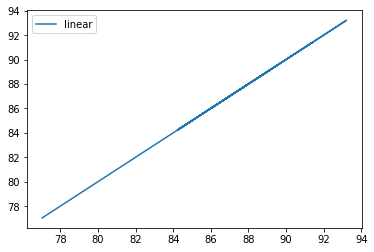

In [110]:
x = iq_weather_history.iloc[670:700]['date']
y = iq_weather_history.iloc[670:700]['temperatureMax']

# Prepare the data
# x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, y, label='temperatureMax')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# save this example of the json object returned by the darksky api

# {
#     "latitude": 18.4653,
#     "longitude": -66.1167,
#     "timezone": "America/Puerto_Rico",
#     "daily": {
#         "data": [
#             {
#                 "time": 609998400,
#                 "summary": "Drizzle in the morning.",
#                 "icon": "rain",
#                 "sunriseTime": 610019894,
#                 "sunsetTime": 610066033,
#                 "moonPhase": 0.87,
#                 "precipIntensity": 0.001,
#                 "precipIntensityMax": 0.0118,
#                 "precipIntensityMaxTime": 610005600,
#                 "precipProbability": 1,
#                 "precipType": "rain",
#                 "temperatureHigh": 85.9,
#                 "temperatureHighTime": 610048800,
#                 "temperatureLow": 72.95,
#                 "temperatureLowTime": 610095600,
#                 "apparentTemperatureHigh": 88.2,
#                 "apparentTemperatureHighTime": 610048800,
#                 "apparentTemperatureLow": 74.07,
#                 "apparentTemperatureLowTime": 610095600,
#                 "dewPoint": 70.15,
#                 "humidity": 0.77,
#                 "pressure": 1017,
#                 "windSpeed": 10.32,
#                 "windBearing": 110,
#                 "cloudCover": 0.41,
#                 "uvIndex": 6,
#                 "uvIndexTime": 610038000,
#                 "temperatureMin": 72.95,
#                 "temperatureMinTime": 610009200,
#                 "temperatureMax": 85.9,
#                 "temperatureMaxTime": 610048800,
#                 "apparentTemperatureMin": 74.36,
#                 "apparentTemperatureMinTime": 610009200,
#                 "apparentTemperatureMax": 88.2,
#                 "apparentTemperatureMaxTime": 610048800
#             }
#         ]
#     },
#     "offset": -4
# }